# **Evaluación, simulación y validación de idoneidad de algoritmos**

In [82]:
#Carga de Librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import statsmodels.api as sm
import seaborn as sns
import time
import sys
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, roc_curve, roc_auc_score, confusion_matrix, r2_score, mean_squared_error, mean_absolute_error
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.linear_model import LogisticRegression, LinearRegression

#Para poder ver bases completas cuando necesitamos info
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

## Carga y Visualización de archivos

In [83]:
#Carga y visualización de Archivos
wine = pd.read_csv("winequality-red.csv", sep = ";")
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [84]:
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


## Factores de Calidad del Vino

De acuerdo a al sistema de Robert Parker, los vinos puntuados se dividen en seis categorías:

* Excepciones: 96 a 100

* Excelente: 90 a 95

* Muy bueno: 80 a 89

* Medio: 70 a 79

* Por debajo del promedio: 60 a 69

* Inferior e inaceptable: 50 a 59

Nosotros lo dividiremos en dos categorías, bueno y malo. Sin embargo, contamos con valores del 1 al 8, por lo que se hará la conversión. Con esto, obtenemos que a partir de una puntuación de 6 se considera un vino bueno.

In [85]:
wine["quality"].value_counts()

quality
5    681
6    638
7    199
4     53
8     18
3     10
Name: count, dtype: int64

In [86]:
#Arriba de 6 es considerado Bueno
wine["quality_cat"] = wine["quality"].apply(lambda x: "mayor" if x >= 6 else "menor")
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,quality_cat
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,menor
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,menor
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,menor
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,mayor
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,menor


## Modelos

### Regresión Lineal Múltiple

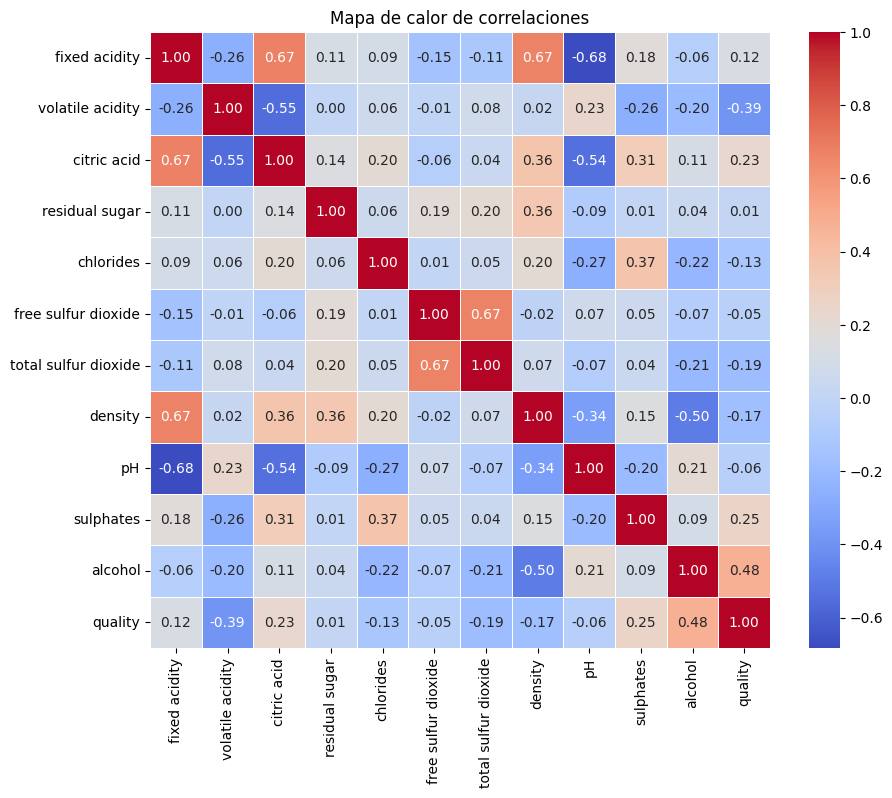

In [87]:
#Calculamos correlaciones entre variables
wine_num = wine.select_dtypes(include=[np.number])
correlation_matrix = wine_num.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=.5)
plt.title("Mapa de calor de correlaciones")
plt.show()

In [88]:
start_time = time.time()

#Declaramos variables
x = wine[["alcohol", "sulphates"]]
y = wine["quality"]

#Generamos modelo
model = LinearRegression()
type(model)
model.fit(X = x, y = y)
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['alcohol', 'sulphates'], dtype=object),
 'n_features_in_': 2,
 'coef_': array([0.34604233, 0.99409492]),
 'rank_': 2,
 'singular_': array([42.60489518,  6.74552922]),
 'intercept_': 1.374966738994325}

#### Evaluación del Modelo

In [90]:
print("RESULTADOS DE MODELO ORIGINAL")

model = LinearRegression()
model.fit(x, y)
y_pred = model.predict(x)

#Evaluación
r_squared = r2_score(y, y_pred)
print(f"R-squared (R²): {r_squared}")
mse = mean_squared_error(y, y_pred)
print(f"Mean Squared Error (MSE): {mse}")
mae = mean_absolute_error(y, y_pred)
print(f"Mean Absolute Error (MAE): {mae}")
x = sm.add_constant(x)
model = sm.OLS(y, x).fit()
p_values = model.pvalues
bic = model.bic
aic = model.aic

print(f"Valores p:\n{p_values}")
print(f"BIC (Criterio de Información de Bayes): {bic}")
print(f"AIC (Criterio de Información de Akaike): {aic}")

print("RESULTADOS DE MODELO CON VALIDACION CRUZADA")

#Partición de sets de datos:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=311)
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mse_underfit = mean_squared_error(y_test, y_pred)
print(f"MSE - Underfit: {mse_underfit}")

RESULTADOS DE MODELO ORIGINAL
R-squared (R²): 0.2698912401727078
Mean Squared Error (MSE): 0.4758560794402521
Mean Absolute Error (MAE): 0.5344320281893546
Valores p:
const        1.642912e-14
alcohol      1.725066e-88
sulphates    1.045866e-21
dtype: float64
BIC (Criterio de Información de Bayes): 3372.4157508139415
AIC (Criterio de Información de Akaike): 3356.2843496754394
RESULTADOS DE MODELO CON VALIDACION CRUZADA
MSE - Underfit: 0.46013917906658913


#### Consideraciones computacionales

In [65]:
linear_regresion_training_time = time.time() - start_time

print(f"Tiempo de entrenamiento: {linear_regresion_training_time:.2f} segundos")

lr_memory_usage = sys.getsizeof(model)

print(f"Requisitos de memoria: {lr_memory_usage / (1024 * 1024):.2f} MB")
print(f"Requisitos de memoria en bytes: {lr_memory_usage} bytes")

Tiempo de entrenamiento (SVM): 0.46 segundos
Requisitos de memoria (SVM): 0.00 MB
Requisitos de memoria (SVM en bytes): 56 bytes


### ONE WAY ANOVA

In [66]:
#Seleccionamos variables
anova_wine = wine.iloc[ : , [10, 12]]
anova_wine.head()

,alcohol,quality_cat
0,9.4,menor
1,9.8,menor
2,9.8,menor
3,9.8,mayor
4,9.4,menor


In [67]:
start_time = time.time()

#Modelo
agrudatos1 = [group[1]["alcohol"] for group in anova_wine.groupby('quality_cat')] #
estadistico_f, p_valor = stats.f_oneway(*agrudatos1)
anova_modelo = stats.f_oneway(*agrudatos1)

# Imprimimos el resultado
print("ANOVA de una vía - Resultados:")
print(f"Puntaje F: {estadistico_f:.2f}")
print(f"P-valor: {p_valor}")

alpha = 0.05 
if p_valor < alpha:
    print("Se rechaza la hipótesis nula. Existen diferencias significativas entre grupos.")
else:
    print("No se rechaza la hipótesis nula. No existen diferencias significativas entre grupos.")

ANOVA de una vía - Resultados:
Puntaje F: 372.19
P-valor: 1.0239802386370231e-74
Se rechaza la hipótesis nula. Existen diferencias significativas entre grupos.


C:\Users\maria\AppData\Local\Temp\ipykernel_13096\2014686941.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='quality_cat', y='alcohol', data=anova_wine, palette='Set2')


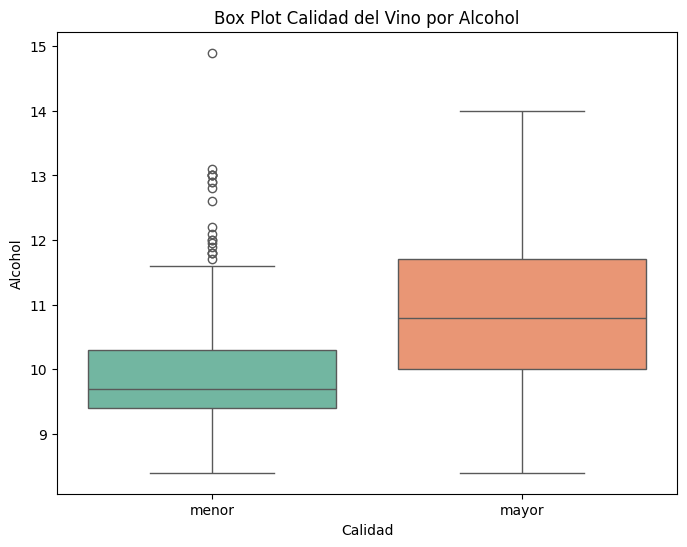

In [68]:
#visualizamos los datos:
plt.figure(figsize=(8, 6))
sns.boxplot(x='quality_cat', y='alcohol', data=anova_wine, palette='Set2')
plt.title('Box Plot Calidad del Vino por Alcohol')
plt.xlabel('Calidad')
plt.ylabel("Alcohol")
plt.show()

In [69]:
#Prueba Post-Hoc
#para realizar comparaciones entre grupos
tukeyresultado1 = pairwise_tukeyhsd(anova_wine["alcohol"], anova_wine["quality_cat"])
print("\nResultados Tukey-Kramer prueba Post Hoc:")
print(tukeyresultado1)


Resultados Tukey-Kramer prueba Post Hoc:
Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj lower   upper  reject
--------------------------------------------------
 mayor  menor  -0.9286   0.0 -1.023 -0.8341   True
--------------------------------------------------


#### Evaluación del Modelo

In [70]:
alpha = 0.05 

# Calcula los grados de libertad del numerador (df1) y denominador (df2)
df1 = len(agrudatos1) - 1
df2 = len(agrudatos1) - sum(len(group) for group in agrudatos1)  
R_squared = estadistico_f / (estadistico_f + (df2 / df1))
n = sum(len(group) for group in agrudatos1)  
p = df1  
adj_R_squared = 1 - ((1 - R_squared) * (n - 1) / (n - p - 1))

print(f"Coeficiente de determinación (R^2): {R_squared:.4f}")
print(f"R^2 pronosticada: {adj_R_squared:.4f}")
mse_values = []

for group in agrudatos1:
    group_mean = np.mean(group)
    residuals = group - group_mean    
    sse = np.sum(residuals ** 2)    
    df_error = len(group) - 1    
    mse = sse / df_error    
    mse_values.append(mse)

primer_grupo_mse = mse_values[0]
print("MSE del primer grupo:", primer_grupo_mse)
segundo_grupo_mse = mse_values[1]
print("MSE del segundo grupo:", segundo_grupo_mse)

Coeficiente de determinación (R^2): -0.3039
R^2 pronosticada: -0.3047
MSE del primer grupo: 1.2234777996904835
MSE del segundo grupo: 0.5745738541802341


#### Consideraciones Computacionales

In [71]:
anova_training_time = time.time() - start_time

print(f"Tiempo de entrenamiento: {anova_training_time:.2f} segundos")

anova_memory_usage = sys.getsizeof(model)

print(f"Requisitos de memoria: {anova_memory_usage / (1024 * 1024):.2f} MB")
print(f"Requisitos de memoria en bytes: {anova_memory_usage} bytes")

Tiempo de entrenamiento (SVM): 6.65 segundos
Requisitos de memoria (SVM): 0.00 MB
Requisitos de memoria (SVM en bytes): 56 bytes


### Análisis Discriminante

   fixed acidity  alcohol
1            7.8      9.8
2            7.8      9.8
3           11.2      9.8
4            7.4      9.4
5            7.4      9.4
[0 0 0 ... 1 0 1]


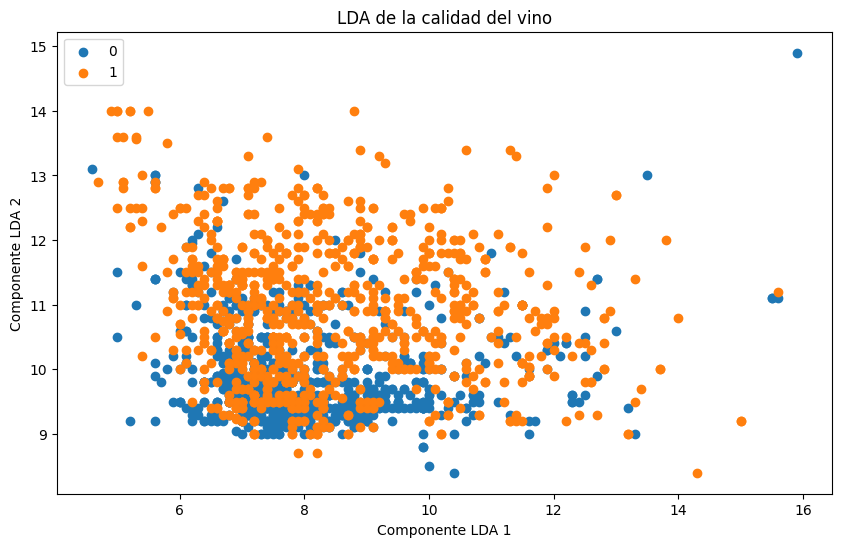

In [72]:
# Definimos variables
wine["quality_cat_mayor"] = wine["quality_cat"].apply(lambda x: 1 if x == "mayor" else 0)

X = wine[["fixed acidity", "alcohol"]]
y = wine["quality_cat_mayor"]

start_time = time.time()

# # Ajustamos el modelo de LDA.
lda = LinearDiscriminantAnalysis()
lda.fit(X, y)
print(X.iloc[1:6, :])
X_lda = lda.transform(X)

plt.figure(figsize=(10,6))

y_pred = lda.predict(X)
print(y_pred)


colors = ['navy', 'turquoise', 'darkorange', "orange"]
for quality in wine["quality_cat_mayor"].unique():
    plt.scatter(X[y == quality][X.columns[0]], X[y == quality][X.columns[1]], label=quality)


plt.xlabel('Componente LDA 1')
plt.ylabel('Componente LDA 2')
plt.title('LDA de la calidad del vino')

plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.show()

#### Evaluación de Modelo

In [73]:
#Evaluamos el modelo de discriminación
# Exactitud
accuracy = accuracy_score(y, y_pred)
print(f'Exactitud: {accuracy:.2f}')

# Precisión
precision = precision_score(y, y_pred, average='binary', pos_label = 1)
print(f'Precisión: {precision:.2f}')

# Tasa de recuperación
recall = recall_score(y, y_pred, average='binary', pos_label = 1)
print(f'Tasa de Recuperación: {recall:.2f}')

# Puntaje F1
f1 = f1_score(y, y_pred, average='binary', pos_label = 1)
print(f'Puntaje F1: {f1:.2f}')

Exactitud: 0.71
Precisión: 0.75
Tasa de Recuperación: 0.69
Puntaje F1: 0.72


In [74]:
#Hacemos la Validación cruzada
k = 30
cross_val_scores = cross_val_score(lda, X, y, cv=k, scoring='accuracy')
print("Precisión promedio:", cross_val_scores.mean())
print("Desviación estándar de la precisión:", cross_val_scores.std())

Precisión promedio: 0.7118099231306779
Desviación estándar de la precisión: 0.10257814639817701


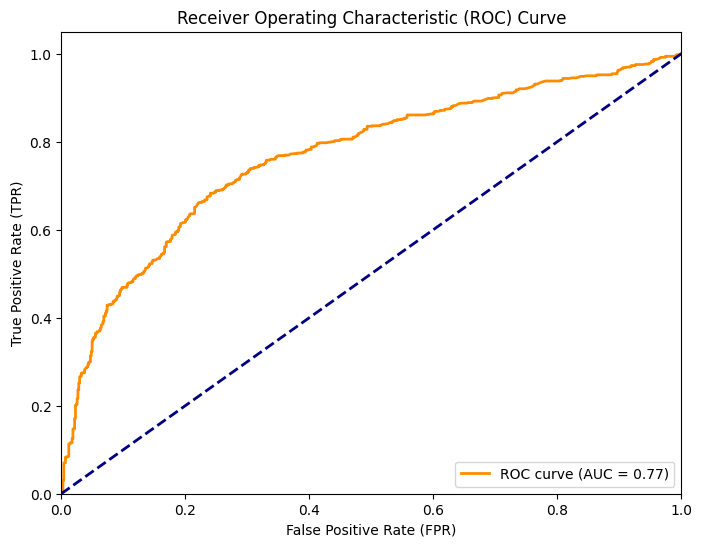

In [75]:
#Medimos ROC y AUC
y_proba = lda.predict_proba(X)
fpr, tpr, thresholds = roc_curve(y, y_proba[:, 1])
auc = roc_auc_score(y, y_proba[:, 1])
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

#### Consideraciones Computacionales

In [76]:
lda_training_time = time.time() - start_time

print(f"Tiempo de entrenamiento: {lda_training_time:.2f} segundos")

lda_memory_usage = sys.getsizeof(model)

print(f"Requisitos de memoria: {lda_memory_usage / (1024 * 1024):.2f} MB")
print(f"Requisitos de memoria en bytes: {lda_memory_usage} bytes")

Tiempo de entrenamiento (SVM): 6.61 segundos
Requisitos de memoria (SVM): 0.00 MB
Requisitos de memoria (SVM en bytes): 56 bytes


### Regresión Logística

In [77]:
wine["quality_cat_mayor"] = wine["quality_cat"].apply(lambda x: 1 if x == "mayor" else 0)

X = wine[["fixed acidity", "alcohol"]]
y = wine["quality_cat_mayor"]

start_time = time.time()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
logistic_model = LogisticRegression()
logistic_model.fit(X_train, y_train)
y_pred = logistic_model.predict(X_test)

#### Evaluación de Modelo

In [78]:
#Matriz de confusión
confusion = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:')
print(confusion)

#Classification Report
class_report = classification_report(y_test, y_pred)
print('Classification Report:')
print(class_report)

Confusion Matrix:
[[108  33]
 [ 52 127]]
Classification Report:
              precision    recall  f1-score   support

           0       0.68      0.77      0.72       141
           1       0.79      0.71      0.75       179

    accuracy                           0.73       320
   macro avg       0.73      0.74      0.73       320
weighted avg       0.74      0.73      0.74       320



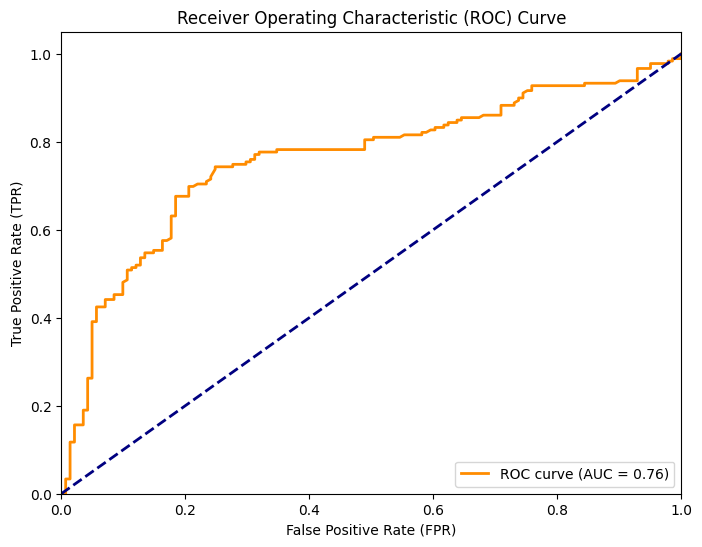

In [79]:
# Curva ROC y calculamos el AUC
y_prob = logistic_model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
auc = roc_auc_score(y_test, y_prob)

# Realizamos el gráfico de la curva ROC.
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

#### Consideraciones Computacionales

In [80]:
lit_training_time = time.time() - start_time

print(f"Tiempo de entrenamiento: {lit_training_time:.2f} segundos")

lit_memory_usage = sys.getsizeof(model)

print(f"Requisitos de memoria: {lit_memory_usage / (1024 * 1024):.2f} MB")
print(f"Requisitos de memoria en bytes: {lit_memory_usage} bytes")

Tiempo de entrenamiento (SVM): 2.42 segundos
Requisitos de memoria (SVM): 0.00 MB
Requisitos de memoria (SVM en bytes): 56 bytes


## Bibliografía

https://www.wine.com.mx/wineverso/noticias-y-curiosidades/la-puntuacion-del-vino/#:~:text=En%20el%20sistema%20de%20Robert%20Parker%2C%20los%20vinos,69%206%20Inferior%20e%20inaceptable%3A%2050%20a%2059